In [15]:
import torch
from sklearn.datasets import make_circles

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
n_sample = 1000

X, y = make_circles(n_sample, noise=0.03, random_state=42)

In [9]:
X.shape

(1000, 2)

In [10]:
y.shape

(1000,)

In [13]:
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [14]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

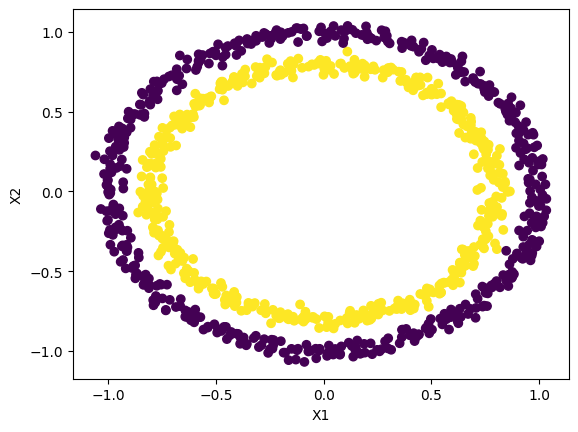

In [17]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [18]:
X.shape, y.shape

((1000, 2), (1000,))

In [20]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)



TypeError: expected np.ndarray (got Tensor)

In [23]:
X[1], y[1]

(tensor([-0.7562,  0.1533]), tensor(1.))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
len(X_train), len(X_test)

(800, 200)

In [26]:
len(y_train), len(y_test)

(800, 200)

In [27]:
from torch import nn

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
device

'cpu'

In [32]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
      return self.layer_2(self.layer_1(x))

model = CircleModel().to(device)
model


CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

(torch.Size([1000, 2]), torch.Size([1000]))

In [35]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

In [36]:
model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [37]:
untrained_preds = model(X_test.to(device))

In [39]:
X_test.shape

torch.Size([200, 2])

In [38]:
print(len(untrained_preds))

200
